Import the libraries we need:

In [27]:
import numpy as np
from cv2 import aruco
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
ARUCO_DICT = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)

Create a dictionary to hold the images

In [28]:
def bw_image_addMargin(img, margin_width, color):
    # read image
    old_image_height, old_image_width = img.shape

    # create new image of desired size and color (blue) for padding
    new_image_width = old_image_width + 2*margin_width
    new_image_height = old_image_height + 2*margin_width
    result = np.full((new_image_height,new_image_width), color, dtype=np.uint8)

    # compute center offset
    x_center = (new_image_width - old_image_width) // 2
    y_center = (new_image_height - old_image_height) // 2

    # copy img image into center of result image
    result[y_center:y_center+old_image_height, x_center:x_center+old_image_width] = img
    
    return result

In [37]:
def image_add_id(img, id, xOffset, yOffset):
    # write the id number onto the image at the specified location:
    font = cv2.QT_FONT_NORMAL
    fontScale = 1
    fontColor = (0,0,0)
    lineType = 1
    cv2.putText(img, str(id), (xOffset, yOffset), font, fontScale, fontColor, lineType)
    return img

In [39]:
numMarkers=50

OUTDIR="aru_output"
for num in range(numMarkers):
    img = aruco.generateImageMarker(ARUCO_DICT, num, 100)
    filename=f"{OUTDIR}/marker{num}.png"
    img = bw_image_addMargin(img, 75,255)
    img = bw_image_addMargin(img, 5,0)
    img = bw_image_addMargin(img, 5,255)
    img = bw_image_addMargin(img, 5,255)
    bottomRightX = img.shape[1]*(.85 if len(str(num)) == 1 else .8)
    bottomRightY = img.shape[0]*.9
    img = image_add_id(img, num, int(bottomRightX), int(bottomRightY))
    cv2.imwrite(filename, img)

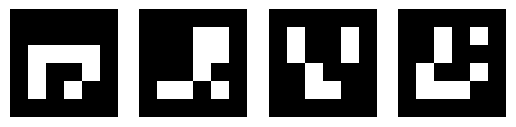

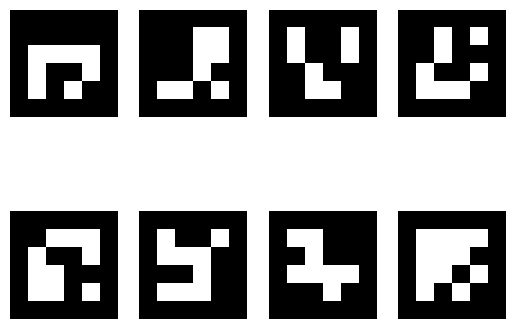

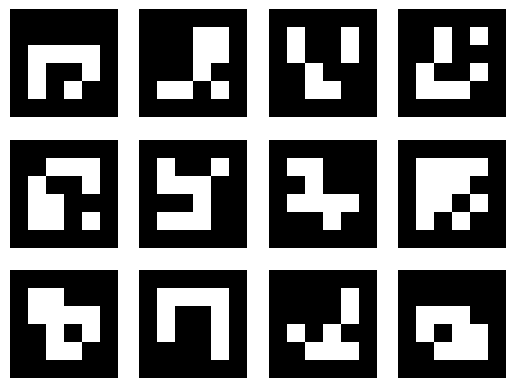

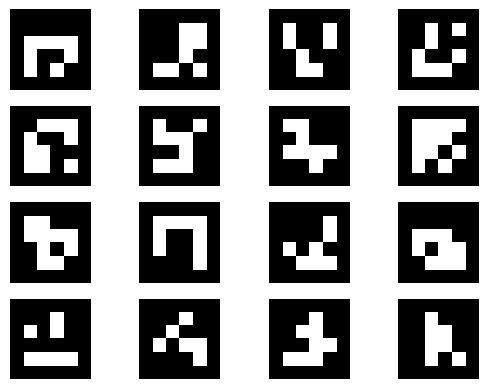

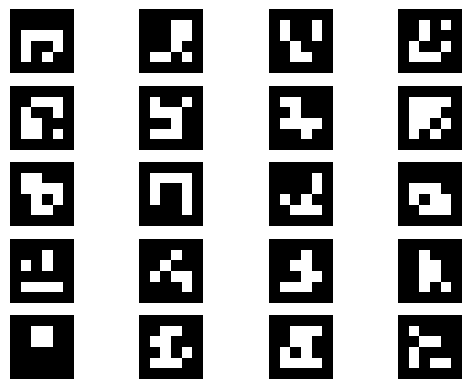

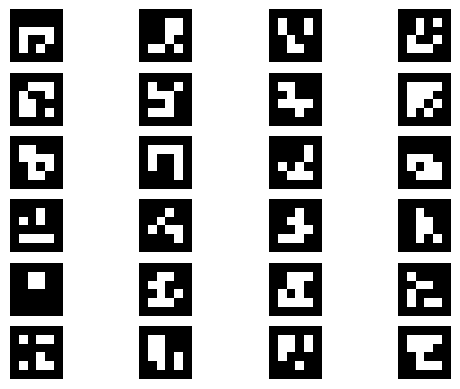

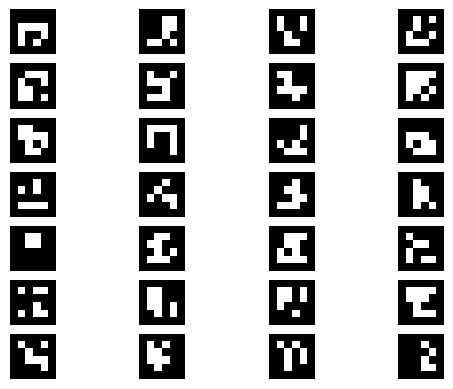

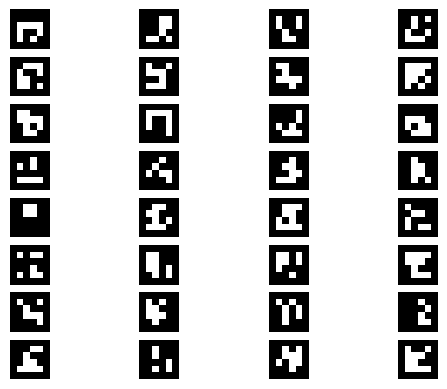

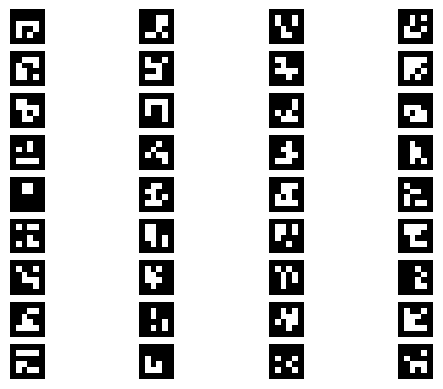

In [24]:
nx=4
OUTDIR="aru_output"
for ny in range(1,10):
    fig = plt.figure()
    for i in range(1, nx*ny+1):
        ax = fig.add_subplot(ny,nx, i,frameon=False)
        img = aruco.generateImageMarker(ARUCO_DICT,i, 700)
        cv2.imwrite(f"{OUTDIR}/marker{i}.png", img)
        plt.imshow(img, cmap = mpl.cm.gray, interpolation='nearest')
        ax.axis("off")

    # plt.savefig(f"{OUTDIR}/markers{ny}.pdf")
    plt.show()

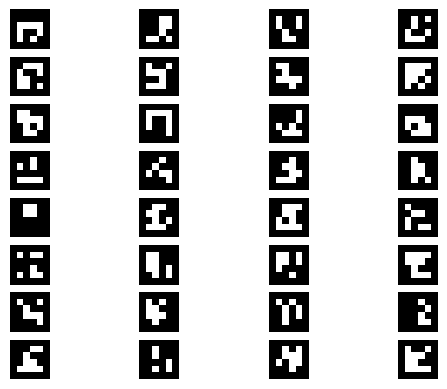

In [25]:
fig = plt.figure()
nx = 4
ny = 8
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.generateImageMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")
plt.savefig(f"{OUTDIR}/testMarkers.pdf")
plt.show()